<a href="https://colab.research.google.com/github/T0n-k4/Ugliest-Nightmare-Prettiest-Dream/blob/main/Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
import wandb as wb

Comment: The code installs the necessary packages (wandb, pdf2image, flashtorch) and system utilities (poppler-utils) for working with machine learning, PDF processing, and visualization tasks. It also imports required modules for these tasks. Additionally, it sets up the Weights and Biases (W&B) library for experiment tracking and visualization.

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device)

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image, size=224):
    means = [0.485, 0.456, 0.406]
    stds = [0.229, 0.224, 0.225]
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(means, stds)
    ])
    tensor = transform(image).unsqueeze(0).to(device)
    tensor.requires_grad = True
    return tensor



Comment: This code defines functions for working with PyTorch tensors and images, as well as downloading and processing Google Slides presentations. It includes functions to create tensors on the GPU, plot images, download Google Slides as PDFs, convert PDFs to images, and load images into PyTorch tensors with normalization. The functions enable efficient processing and analysis of images, particularly for machine learning tasks.

In [6]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Comment: This code defines a dictionary `labels` by retrieving and parsing a JSON file from a URL. The JSON file contains integer keys and string values, likely representing class labels for a classification task.

The code also loads an AlexNet model with default weights and moves it to the specified device (GPU if available). The model is then set to evaluation mode (`model.eval()`), which typically disables dropout and batch normalization layers. This suggests that the model is being prepared for inference rather than training.

In [7]:
url = "https://docs.google.com/presentation/d/1D5viali4hu0g9eJd-pGIsPpuRwKUh6w_OU-Y0iXeX9c/edit#slide=id.g1f7dae996cd_0_5"

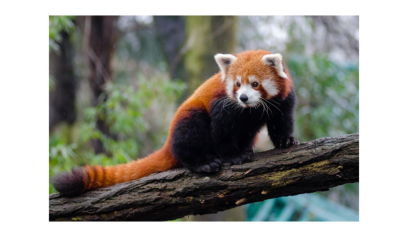

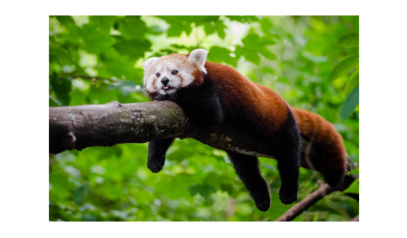

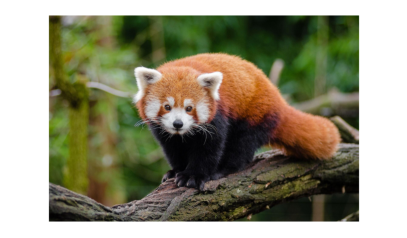

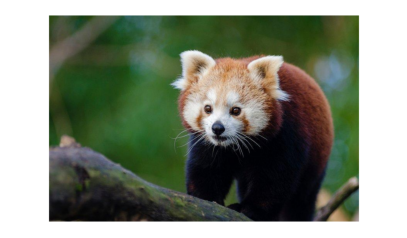

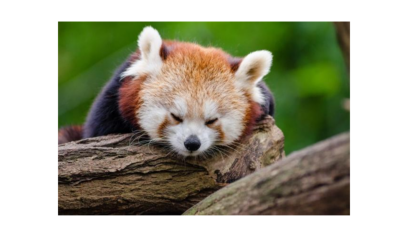

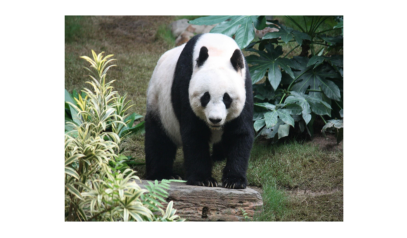

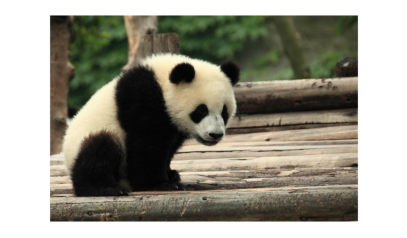

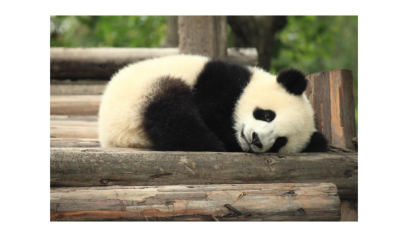

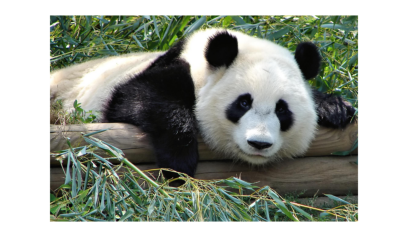

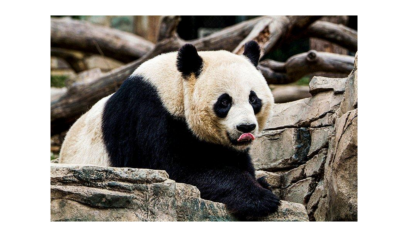

In [8]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

Comment: This code iterates over a list of images obtained from a Google Slides presentation URL using the `get_slides` function. For each image, it plots the image using the `plot` function and then loads and preprocesses it into a PyTorch tensor using the `load` function. The preprocessed tensors are then collected into a list called `images`. Finally, all the tensors in the `images` list are vertically stacked into a single tensor using `torch.vstack`, resulting in a tensor containing all the preprocessed images.

In [9]:
images.shape

torch.Size([10, 3, 224, 224])

In [10]:
model(images)

tensor([[-5.8360,  6.8875, -5.5757,  ...,  3.1127,  5.1876,  1.2319],
        [-0.4301,  1.5609, -4.5116,  ...,  5.8628,  1.4510, -0.2802],
        [-6.9813, 10.1189, -5.5575,  ...,  6.9845,  6.2196,  1.6223],
        ...,
        [-6.0408, -4.3486,  1.2974,  ..., -3.9113, -0.4621,  1.7838],
        [-5.2296, -4.2007,  3.4821,  ..., -3.8912,  2.4380,  5.0700],
        [-5.1989, -2.3234,  1.2341,  ..., -2.1130,  1.6160,  1.3793]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [11]:
y = model(images)

In [12]:
y.shape

torch.Size([10, 1000])

In [13]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [14]:
for i in list(guesses):
    print(labels[i])

lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca


Comment: This code iterates over each element in the `guesses` list and prints the corresponding label from the `labels` dictionary. The `labels` dictionary maps integer keys to string values, likely representing class labels. By using the integer values from `guesses` as keys, the code retrieves and prints the corresponding class labels from the `labels` dictionary.

In [15]:
Y = np.zeros(50,)
Y[25:] = 1

In [16]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
# Y = np.zeros(100,)
# Y[50:] = 1

In [18]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
X = y.detach().cpu().numpy()

In [20]:
X.shape

(10, 1000)

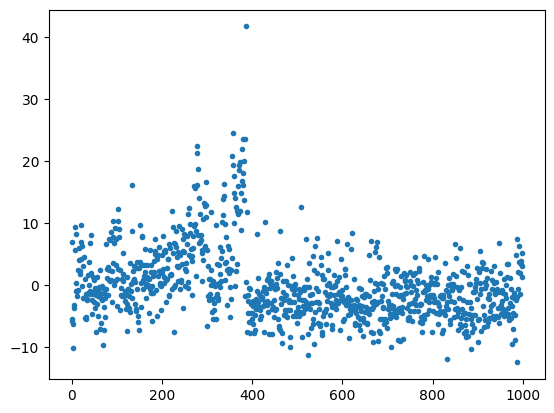

In [21]:
plt.plot(X[0],'.')

(array([ 56., 381., 376., 120.,  40.,  19.,   7.,   0.,   0.,   1.]),
 array([-12.51659679,  -7.09103823,  -1.6654793 ,   3.76007938,
          9.18563843,  14.61119652,  20.03675652,  25.46231461,
         30.8878727 ,  36.31343079,  41.73899078]),
 <BarContainer object of 10 artists>)

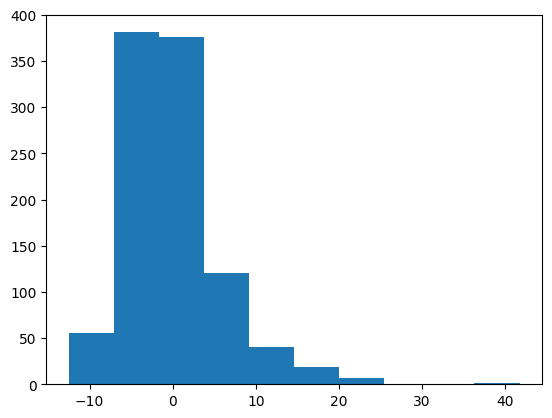

In [22]:
plt.hist(X[0])

In [23]:
X = GPU_data(X)
Y = GPU_data(Y)

In [24]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

Comment: The `softmax` function takes a tensor `x` as input and computes the softmax function along its second dimension. It first exponentiates each element of `x` after subtracting the maximum value along the second dimension, ensuring numerical stability. Then, it normalizes the resulting values by dividing by the sum along the second dimension, effectively converting the input tensor into a probability distribution. Finally, it returns the normalized tensor, representing the probabilities of each element along the second dimension.

In [25]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

Comment: This `cross_entropy` function calculates the average cross-entropy loss between predicted outputs and ground truth labels. It first computes the softmax probabilities of the outputs and then selects the log probabilities corresponding to the correct class labels. These log probabilities are summed across the batch dimension, negated, and averaged to obtain the final loss. The function is designed to work with batches of data, where `outputs` is a tensor of predicted probabilities and `labels` is a tensor of ground truth class labels.

In [26]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

Comment: This `randn_trunc` function generates random numbers from a truncated normal distribution with mean `mu = 0` and standard deviation `sigma = 0.1`. It uses the `scipy.stats.truncnorm` class to create a truncated normal distribution object `R` with lower and upper bounds calculated based on `mu` and `sigma`. The function then generates random samples from this distribution using the `rvs` method with the input shape `s` and returns the samples.

In [27]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

Comment: This `Truncated_Normal` function generates random numbers from a truncated normal distribution using the acceptance-rejection method. It first generates two random tensors `u1` and `u2` of the specified `size`. `u1` is transformed to be between `(0, 1)` and `(np.exp(-2), 1)` to avoid taking the logarithm of zero. Then, it calculates `z` using the acceptance-rejection method formula for truncated normal distribution, where `z` is the square root of `-2 * log(u1)` multiplied by the cosine of `(2 * pi * u2)`. Finally, it returns the tensor `z` containing the random samples from the truncated normal distribution.

In [28]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

Comment: The `acc` function calculates the accuracy of a model's predictions `out` compared to the ground truth labels `y`. It first finds the index of the maximum value along the second dimension of `out` to determine the predicted class labels. Then, it compares these predicted labels with the ground truth labels `y` to count the number of correct predictions. Finally, it divides the number of correct predictions by the total number of samples to compute and return the accuracy as a percentage. The function uses `torch.no_grad()` to disable gradient calculations during this operation, as it is only evaluating the model's performance.

In [29]:
X.shape

torch.Size([10, 1000])

In [30]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

Comment: The `get_batch` function is used to retrieve a batch of data for either training or testing purposes. It randomly selects a batch size `b` of samples and corresponding labels from either the training data `X` and `Y` or the testing data `X_test` and `Y_test`, based on the specified `mode`. The function then returns the selected batch of data and labels for further processing in the machine learning model.

In [31]:
def model(x,w):

    return x@w[0]

In [32]:
def make_plots():

    acc_train = acc(model(x,w),y)

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

Comment: The `make_plots` function calculates the training accuracy of a model `model` on a given batch of data `x` and corresponding labels `y` using the `acc` function. It then logs this training accuracy to the Weights and Biases platform using `wb.log`, which presumably records the accuracy for visualization and tracking during training.

The commented-out lines suggest that the function was originally intended to also calculate and log the test accuracy on a separate batch of test data `xt` and `yt`, but this functionality is currently disabled.

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-46-13a1dae5b345>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)


Comment: This code initializes a Weights and Biases project and configures parameters such as step size, batch size, and number of epochs. It then sets up a neural network model and an Adam optimizer. The main loop iterates over the specified number of epochs, fetching a batch of training data, computing the loss, and updating the model weights using backpropagation. Loss values are logged to Weights and Biases, and a function is called to calculate and log the training accuracy.